In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sns

pd.set_option('display.max_columns', 10000)

In [33]:
df=pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding = 'unicode_escape')

In [34]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [40]:
df.columns=['tweet','company','emotion']

In [41]:
df=df.drop([6]).reset_index(drop=True)

In [44]:
df['emotion'] = df['emotion'].apply(lambda x: "No emotion toward brand or product" if x == "I can't tell" else x)

In [48]:
df[df.emotion=='No emotion toward brand or product'].company.value_counts()

iPad                               28
Apple                              23
Google                             16
iPhone                             10
Other Google product or service    10
iPad or iPhone App                 10
Other Apple product or service      1
Android App                         1
Android                             1
Name: company, dtype: int64

In [58]:
punctuation=[",",".","#","!","@","$","?","$","%","&","-","_",":","=", "/",";",'(',")", "{","}","|"]
apple=['iPhone',"iphones",'i phones',"iPad&quot;","iphone ",'i Pad','i Pad',"Apple.","iPad?","#iPad","#iPhone",'iPad','Mac',"iphone,",'iPod','ipod','ipad','mac','Apple','apple','Apple\'s','apple\'s',"#Apple",'#apple','I-Pad']
google=['Google','google','android','Android','Google.','android,',"#android",'Google\'s','google\'s','googles' ,'#google','#Google']

In [59]:
for index in df.index:
    tweet="".join(i if i not in punctuation else " " for i in df.tweet[index])
    condition=0
    df.tweet[index]=tweet

    
    if bool(set(tweet.split())&set(apple))==True:
        df.company[index]=(list(set(tweet.split())&set(apple))[0].title().strip('\'s')).strip('\'S')
        condition=1
    else:
        condition=0
        
    if (bool(set(tweet.split())&set(google))==True) and condition==0:
        df.company[index]=(list(set(tweet.split())&set(google))[0].title().strip('\'s')).strip('\'S')
        
    elif (bool(set(tweet.split())&set(google))==True) and condition==1:
        df.company[index]+= " & "+(list(set(tweet.split())&set(google))[0].title().strip('\'s')).strip('\'S')



In [60]:
df['company'] = df['company'].apply(lambda x: "iPad" if x == "Ipad" else x)
df['company'] = df['company'].apply(lambda x: "iPhone" if x == "Iphone" else x)

In [63]:
df['brand'] = df['company'].apply(lambda x: 'Apple' if x in apple else 'Google' if x in google else '')

In [61]:
df.company.value_counts()

Google                             2413
Apple                              2065
iPad                               1848
iPhone                             1131
Android                             379
Iphone & Android                    132
iPad or iPhone App                   54
Ipad & Android                       29
Mac                                  26
Apple & Google                       23
Ipod                                 15
Other Apple product or service       12
Apple & Android                       7
Ipad & Google                         5
Iphone & Google                       4
Other Google product or service       2
Mac & Android                         1
Ipod & Android                        1
Name: company, dtype: int64

In [66]:
df.brand.value_counts()

Apple     5070
Google    2792
          1230
Name: brand, dtype: int64

In [208]:
dfg=df[['brand','emotion','tweet']].groupby(['brand','emotion']).count()[6:9]
t=dfg['tweet'][0]+dfg['tweet'][1]+dfg['tweet'][2]
for i in range(3):
    dfg['tweet'][i]=dfg['tweet'][i]*100/t

[]

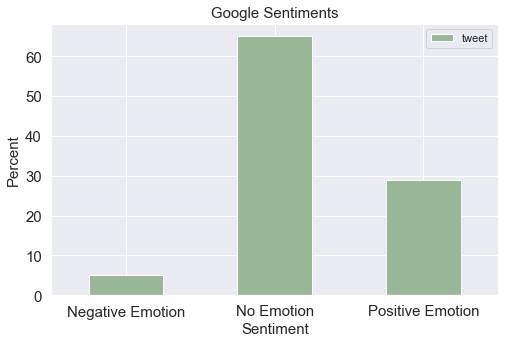

In [246]:
ax=dfg.plot(kind="bar",figsize=(8,5),fontsize=15,color="#99B898")
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('Google Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)
ax.plot()

In [213]:
dfa=df[['brand','emotion','tweet']].groupby(['brand','emotion']).count()[3:6]
t=dfa['tweet'][0]+dfa['tweet'][1]+dfa['tweet'][2]
for i in range(3):
    dfa['tweet'][i]=dfa['tweet'][i]*100/t

Text(0.5, 0, 'Sentiment')

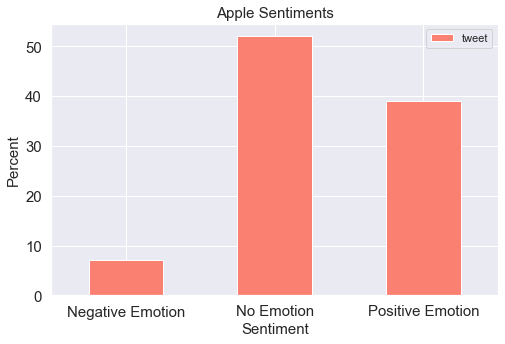

In [214]:
ax=dfa.plot(kind="bar",figsize=(8,5),fontsize=15,color='salmon')
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('Apple Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)

In [216]:
df[['company','emotion','tweet']].groupby(['company','emotion']).count()

tweet
company                         emotion                                  
Android                         Negative emotion                       17
                                No emotion toward brand or product    214
                                Positive emotion                      148
Apple                           Negative emotion                      113
                                No emotion toward brand or product   1124
                                Positive emotion                      828
Apple & Android                 No emotion toward brand or product      4
                                Positive emotion                        3
Apple & Google                  Negative emotion                        1
                                No emotion toward brand or product     14
                                Positive emotion                        8
Google                          Negative emotion                      133
                                No emotion toward brand or product   1612
                                Positive emotion                      668
Ipad & Android                  No emotion toward brand or product     25
                                Positive emotion                        4
Ipad & Google                   No emotion toward brand or product      3
                                Positive emotion                        2
Iphone & Android                Negative emotion                        4
                                No emotion toward brand or product     91
                                Positive emotion                       37
Iphone & Google                 No emotion toward brand or product      1
                                Positive emotion                        3
Ipod                            No emotion toward brand or product      9
                                Positive emotion                        6
Ipod & Android                  Negative emotion                        1
Mac                             Negative emotion                        3
                                No emotion toward brand or product     13
                                Positive emotion                       10
Mac & Android                   Positive emotion                        1
Other Apple product or service  Positive emotion                       12
Other Google product or service Negative emotion                        1
                                Positive emotion                        1
iPad                            Negative emotion                      154
                                No emotion toward brand or product    922
                                Positive emotion                      772
iPad or iPhone App              Negative emotion                        5
                                No emotion toward brand or product      1
                                Positive emotion                       48
iPhone                          Negative emotion                      132
                                No emotion toward brand or product    599
                                Positive emotion                      400

In [237]:
dfi=df[['company','emotion','tweet']].groupby(['company','emotion']).count()[39:43]
t=dfi['tweet'][0]+dfi['tweet'][1]+dfi['tweet'][2]
for i in range(3):
    dfi['tweet'][i]=dfi['tweet'][i]*100/t

Text(0.5, 0, 'Sentiment')

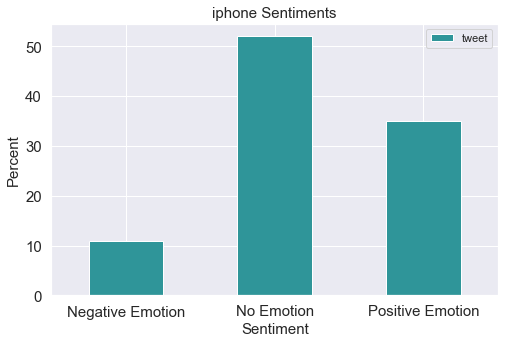

In [243]:
ax=dfi.plot(kind="bar",figsize=(8,5),fontsize=15,color='#2F9599')
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('iphone Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)

In [235]:
dfa=df[['company','emotion','tweet']].groupby(['company','emotion']).count()[:3]
t=dfa['tweet'][0]+dfa['tweet'][1]+dfa['tweet'][2]
for i in range(3):
    dfa['tweet'][i]=dfa['tweet'][i]*100/t

Text(0.5, 0, 'Sentiment')

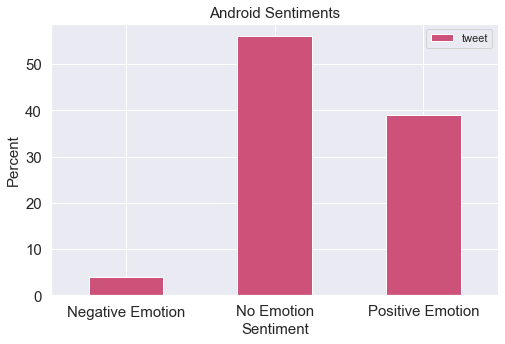

In [242]:
ax=dfa.plot(kind="bar",figsize=(8,5),fontsize=15,color='#CC527A')
ax.set_xticklabels(['Negative Emotion','No Emotion','Positive Emotion'],rotation=0,fontsize=15)
ax.set_title('Android Sentiments',fontsize=15)
ax.set_ylabel('Percent',fontsize=15)
ax.set_xlabel('Sentiment',fontsize=15)